## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("All good!")

All good!


## Load dataset

In [2]:
df = pd.read_csv('spotify_data.csv')

print("✅ Data loaded successfully!")
print("Shape:", df.shape)
print(df.head())

✅ Data loaded successfully!
Shape: (169909, 19)
   acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode

Data Inspection

In [3]:
print('Data Info')
df.info()

df.describe()

df.isnull().sum()


Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo     

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

Clean the Data

In [4]:
df = df.drop_duplicates()
df = df.drop(columns=['id', 'uri', 'track_href', 'analysis_url', 'type'], errors='ignore')

## Basic EDA (Exploratory Data Analysis)

Ranking Songs

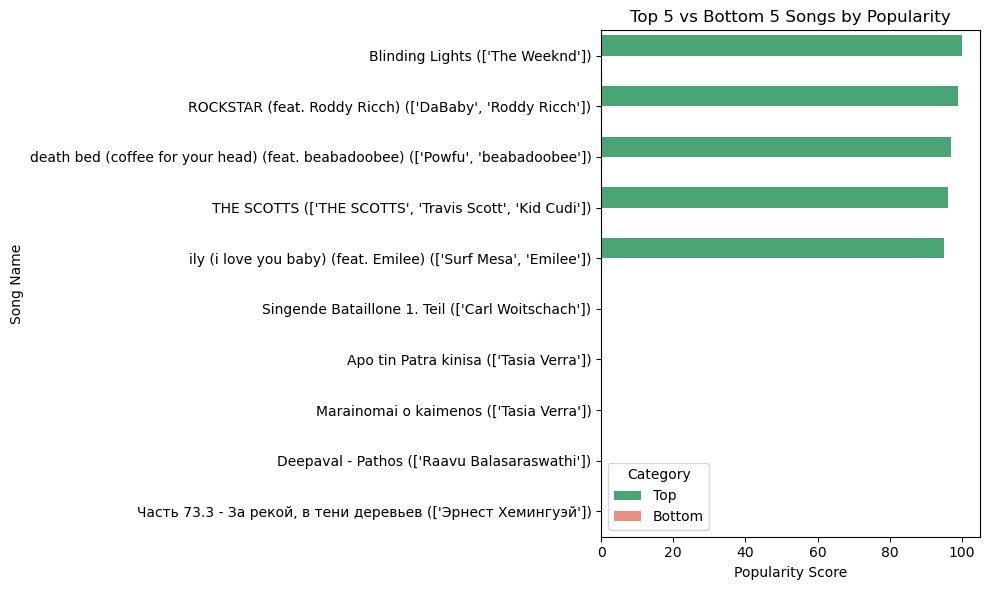

In [5]:
# Get top 5 most popular songs
top_songs = df[['name', 'artists', 'popularity']].sort_values(by='popularity', ascending=False).head(5)

# Get bottom 5 least popular songs
bottom_songs = df[['name', 'artists', 'popularity']].sort_values(by='popularity', ascending=True).head(5)

# Combine them into one DataFrame for easier plotting
top_bottom = pd.concat([top_songs, bottom_songs])
top_bottom['category'] = ['Top']*len(top_songs) + ['Bottom']*len(bottom_songs)

# Create the plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_bottom, x='popularity', y='name', hue='category', palette={'Top':'mediumseagreen','Bottom':'salmon'})
plt.title('Top 5 vs Bottom 5 Songs by Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Song Name')

# Make it easier to read: add artist names to y-axis labels
plt.yticks(ticks=range(len(top_bottom)), labels=[f"{row['name']} ({row['artists']})" for _, row in top_bottom.iterrows()])

plt.legend(title='Category')
plt.tight_layout()
plt.show()


Ranking Artists

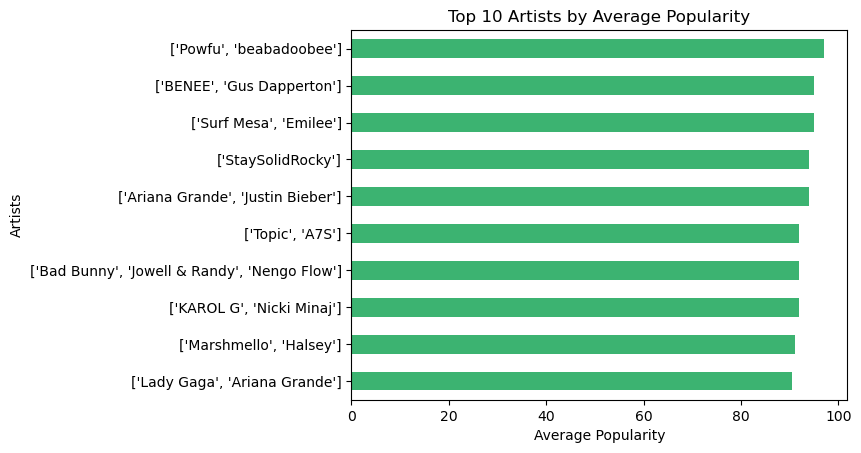

In [6]:
top_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)

# Plot the sorted result
top_artists.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artists')
plt.gca().invert_yaxis()  # optional, makes the highest artist appear on top
plt.show()

### Correlation heatmap

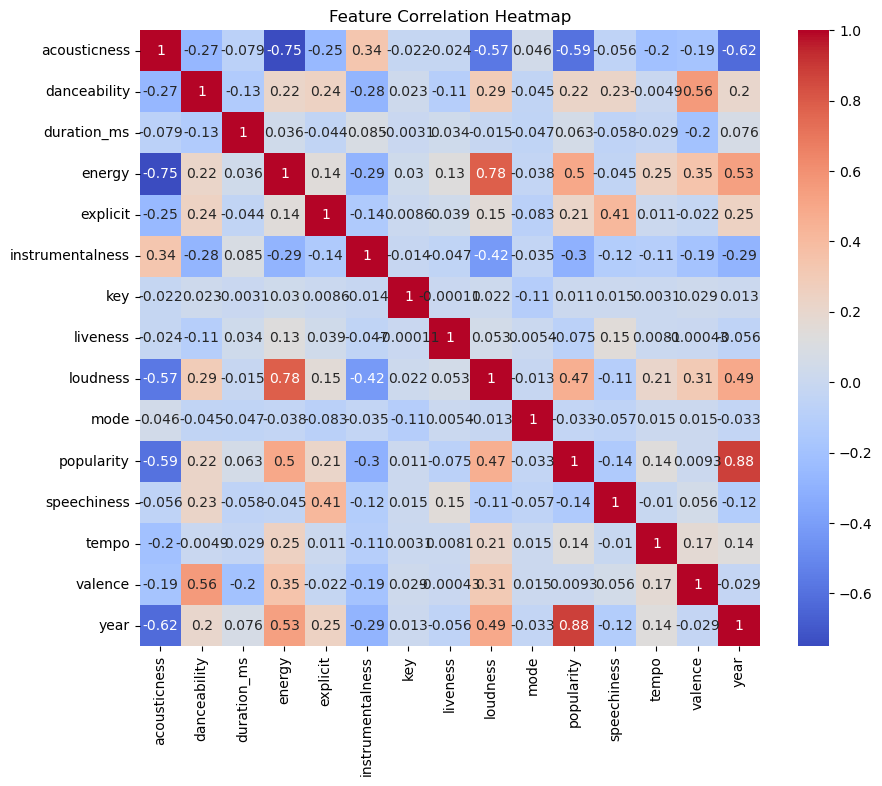

In [7]:
numeric_df = df.select_dtypes('number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Check overall correlations

In [8]:
corr_matrix = df.corr(numeric_only=True)
corr_with_pop = corr_matrix['popularity'].sort_values(ascending=False)
print(corr_with_pop)

popularity          1.000000
year                0.880724
energy              0.497488
loudness            0.466546
danceability        0.221077
explicit            0.214044
tempo               0.135047
duration_ms         0.063292
key                 0.010675
valence             0.009327
mode               -0.032854
liveness           -0.075293
speechiness        -0.135707
instrumentalness   -0.299829
acousticness       -0.593345
Name: popularity, dtype: float64


In [9]:
corr_matrix = df.corr(numeric_only=True)
corr_with_pop = corr_matrix['danceability'].sort_values(ascending=False)
print(corr_with_pop)

danceability        1.000000
valence             0.560242
loudness            0.294170
explicit            0.241891
speechiness         0.225305
popularity          0.221077
energy              0.220569
year                0.203430
key                 0.022599
tempo              -0.004872
mode               -0.045306
liveness           -0.105532
duration_ms        -0.134500
acousticness       -0.265950
instrumentalness   -0.281429
Name: danceability, dtype: float64


In [10]:
corr_matrix = df.corr(numeric_only=True)
corr_with_pop = corr_matrix['valence'].sort_values(ascending=False)
print(corr_with_pop)

valence             1.000000
danceability        0.560242
energy              0.350086
loudness            0.308418
tempo               0.171182
speechiness         0.056383
key                 0.029064
mode                0.014727
popularity          0.009327
liveness           -0.000426
explicit           -0.022327
year               -0.029304
acousticness       -0.185540
instrumentalness   -0.193929
duration_ms        -0.198760
Name: valence, dtype: float64


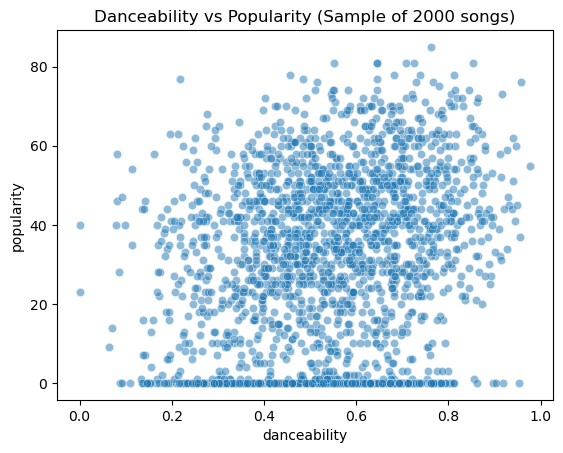

In [11]:
sample_df = df.sample(2000, random_state=42)
sns.scatterplot(data=sample_df, x='danceability', y='popularity', alpha=0.5)
plt.title('Danceability vs Popularity (Sample of 2000 songs)')
plt.show()


In [12]:
df['danceability'].corr(df['popularity'])

0.22107689039161202

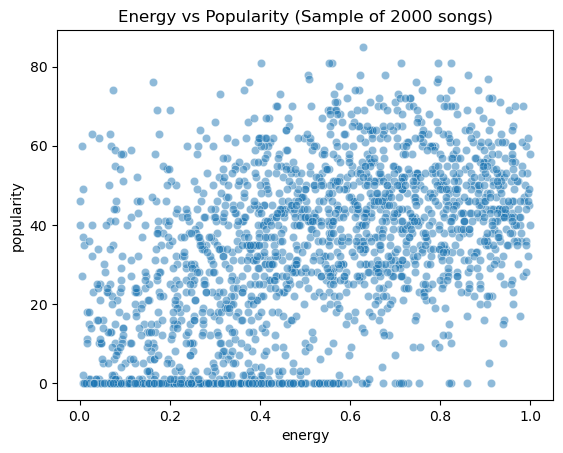

In [13]:
sample_df = df.sample(2000, random_state=42)
sns.scatterplot(data=sample_df, x='energy', y='popularity', alpha=0.5)
plt.title('Energy vs Popularity (Sample of 2000 songs)')
plt.show()

In [15]:
df['energy'].corr(df['popularity'])

0.4974883358769632

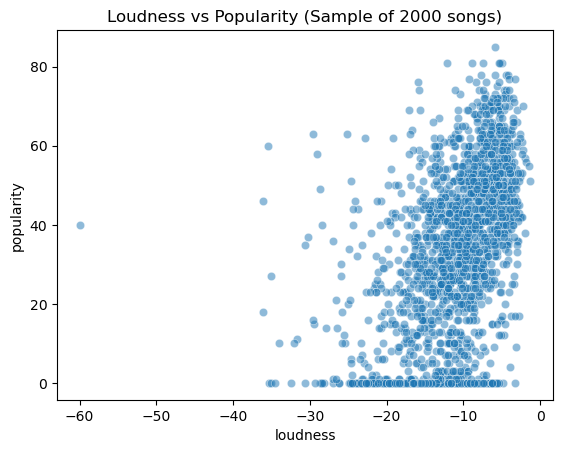

In [14]:
sample_df = df.sample(2000, random_state=42)
sns.scatterplot(data=sample_df, x='loudness', y='popularity', alpha=0.5)
plt.title('Loudness vs Popularity (Sample of 2000 songs)')
plt.show()

In [23]:
df['loudness'].corr(df['popularity'])

0.4665460089760291

Trend Analysis

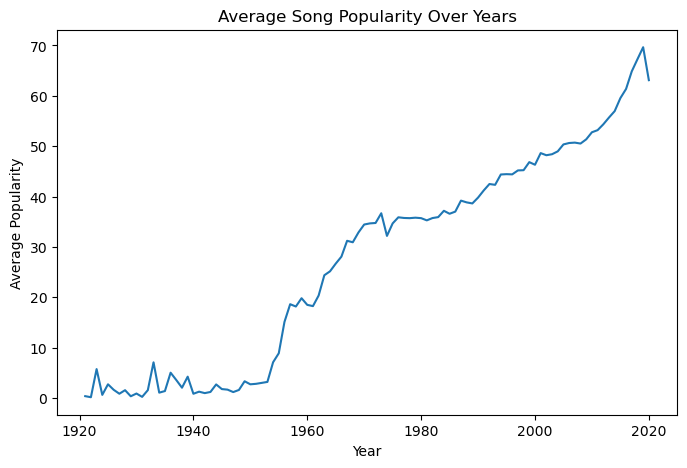

In [16]:
popularity_by_year = df.groupby('year')['popularity'].mean()
popularity_by_year.plot(kind='line', figsize=(8,5), title='Average Song Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()


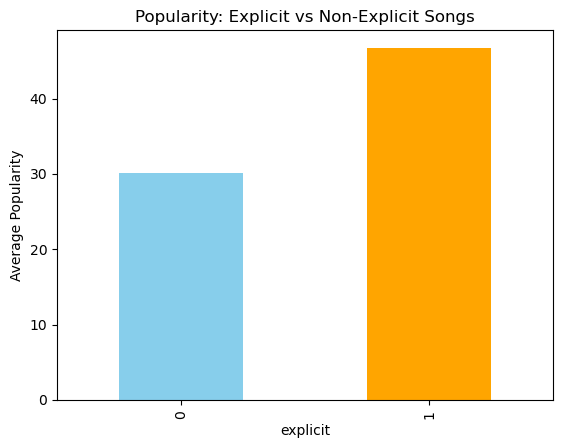

In [17]:
df.groupby('explicit')['popularity'].mean().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Popularity: Explicit vs Non-Explicit Songs')
plt.ylabel('Average Popularity')
plt.show()


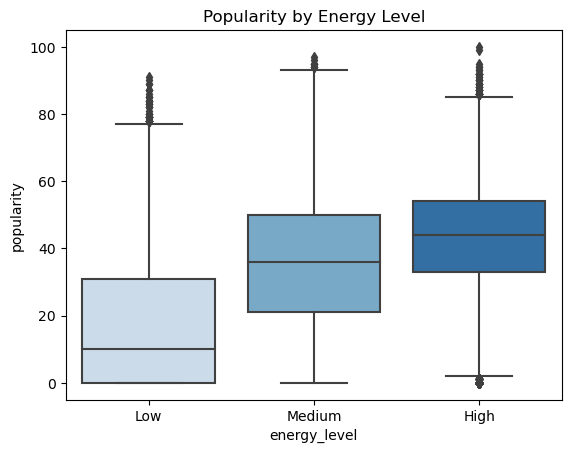

In [18]:
df['energy_level'] = pd.cut(df['energy'], bins=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])
sns.boxplot(data=df, x='energy_level', y='popularity', palette='Blues')
plt.title('Popularity by Energy Level')
plt.show()


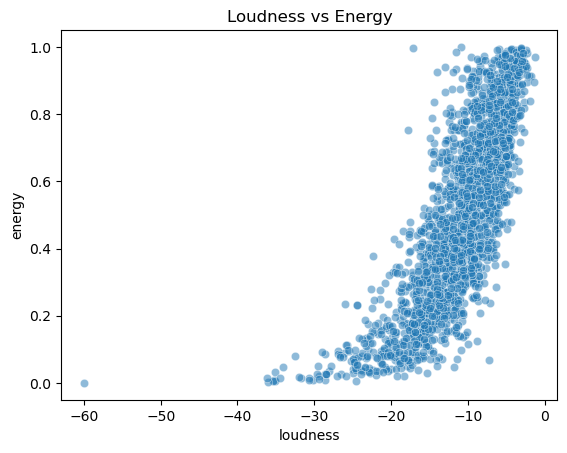

In [19]:
sns.scatterplot(data=df.sample(2000, random_state=42), x='loudness', y='energy', alpha=0.5)
plt.title('Loudness vs Energy')
plt.show()

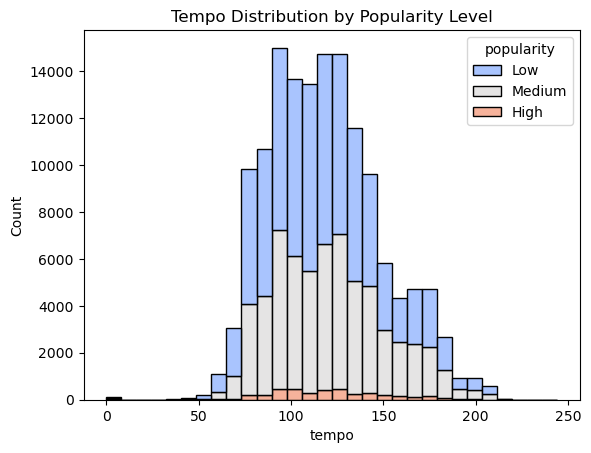

In [20]:
sns.histplot(data=df, x='tempo', bins=30, hue=pd.cut(df['popularity'], bins=[0, 40, 70, 100], labels=['Low', 'Medium', 'High']),
             multiple='stack', palette='coolwarm')
plt.title('Tempo Distribution by Popularity Level')
plt.show()


   speechiness speechiness_level
0       0.0506               Low
1       0.0462               Low
2       0.9290              High
3       0.0926               Low
4       0.0424               Low


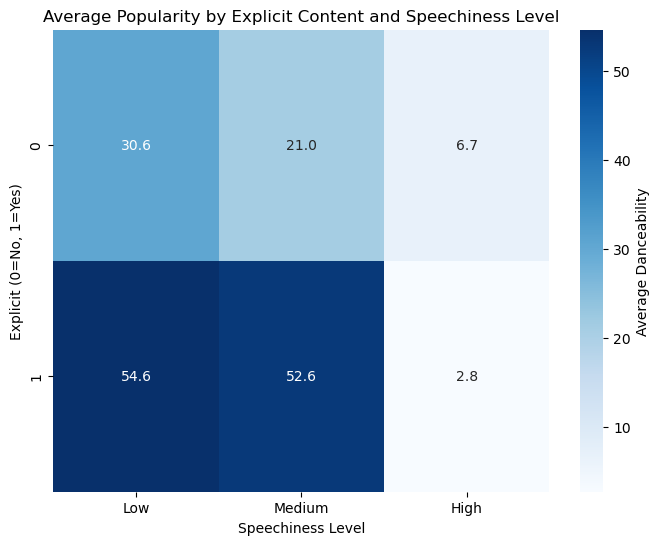

In [30]:
# Make sure 'speechiness_level' exists
# Define bins and labels
bins = [0, 0.33, 0.66, 1.0]  # adjust if needed
labels = ['Low', 'Medium', 'High']

# Create the column
df['speechiness_level'] = pd.cut(df['speechiness'], bins=bins, labels=labels, include_lowest=True)

# Check it worked
print(df[['speechiness', 'speechiness_level']].head())

# Now groupby works
heat_df = df.groupby(['explicit', 'speechiness_level'])['popularity'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(8,6))
ax=sns.heatmap(heat_df, annot=True, cmap='Blues', fmt=".1f")
# Label the color bar (the “hue” equivalent)
colorbar = ax.collections[0].colorbar
colorbar.set_label('Average Danceability')

plt.title('Average Popularity by Explicit Content and Speechiness Level')
plt.xlabel('Speechiness Level')
plt.ylabel('Explicit (0=No, 1=Yes)')
plt.show()

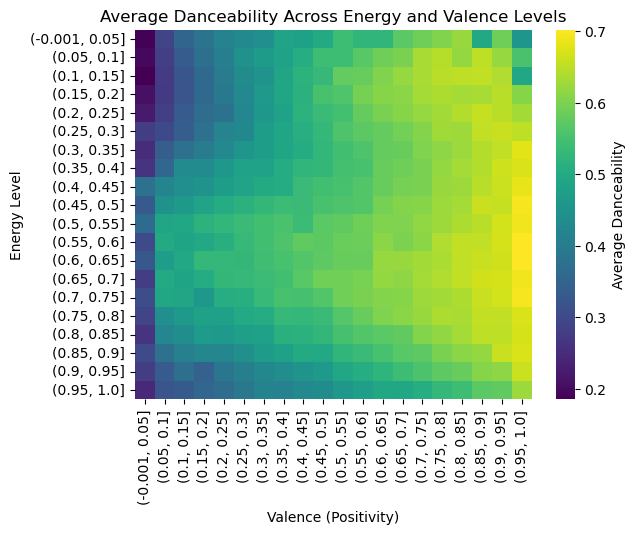

In [28]:
df['valence_bin'] = pd.cut(df['valence'], bins=20)
df['energy_bin'] = pd.cut(df['energy'], bins=20)

heatmap_data = df.pivot_table(
    index='energy_bin', 
    columns='valence_bin', 
    values='danceability', 
    aggfunc='mean'
)

# Plot heatmap
ax = sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Average Danceability Across Energy and Valence Levels')

# Label the color bar (the “hue” equivalent)
colorbar = ax.collections[0].colorbar
colorbar.set_label('Average Danceability')

plt.xlabel('Valence (Positivity)')
plt.ylabel('Energy Level')
plt.show()
